### <center>Twitter Layoffs analysis using different Topic Modelling approaches: A Comparative Study</center>
------------------------------------------------------------------------------------------------------------------------------------------------------


#### IMPORTING MODULES

In [1]:
# data visualisation and manipulation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import string
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

#### LOADING THE DATASET

In [2]:
df = pd.read_csv("tweets.csv")

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,BestCompaniesAZ,Arizona,We validate and elevate the best companies to ...,2009-01-11 16:28:33+00:00,2836.0,2469.0,870,FALSE,2022-12-20 18:00:48+00:00,Apply today!:\nhttps://t.co/eCRVPFByiy\n\n#app...,"['apply', 'hiring', 'opentowork', 'techlayoffs...",Hootsuite Inc.
1,BestCompaniesAZ,Arizona,We validate and elevate the best companies to ...,2009-01-11 16:28:33+00:00,2835.0,2469.0,870,FALSE,2022-12-20 18:00:48+00:00,Apply today!:\nhttps://t.co/eCRVPFByiy\n\n#app...,"['apply', 'hiring', 'opentowork', 'techlayoffs...",Hootsuite Inc.
2,CHILUDO,NaN,AMC APE MAKING APE MOVES,2022-03-27 17:10:55+00:00,19.0,32.0,4,FALSE,2022-12-18 00:21:03+00:00,I want to wish all @Twitter employees that got...,NaN,Twitter Web App
3,ANIL,"New Delhi, India, From Bihar.",New Delhi. Above politicos. An economist and I...,2010-04-17 16:58:14+00:00,81.0,287.0,4484,FALSE,2022-12-17 14:04:44+00:00,@elonmusk sir has call me to work from office....,['TwitterLayoffs'],Twitter for Android
4,🇺🇸 My Head’s Exploding 🤯,leswarden@mastodon.world 👈,"A Proud Believer in Democracy, Our Constitutio...",2009-01-28 01:03:18+00:00,1044.0,777.0,3742,FALSE,2022-12-16 19:47:58+00:00,Here’s what happens when you fire all your eng...,['TickTok'],Twitter for iPhone


In [4]:
df.drop(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source'],axis=1,inplace=True)

In [5]:
df.head()

,text
0,Apply today!:\nhttps://t.co/eCRVPFByiy\n\n#app...
1,Apply today!:\nhttps://t.co/eCRVPFByiy\n\n#app...
2,I want to wish all @Twitter employees that got...
3,@elonmusk sir has call me to work from office....
4,Here’s what happens when you fire all your eng...


#### DATA CLEANING & PRE-PROCESSING

In [6]:
def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http\S+','', tweet)
    tweet = re.sub(':\n+','', tweet)
    tweet = re.sub('#\S+', '', tweet)
    return tweet

def clean_text(tweet):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(tweet)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [7]:
df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(remove_usernames_links)

In [8]:
df.head()

,text
0,Apply today!
1,Apply today!
2,I want to wish all employees that got fired h...
3,sir has call me to work from office. Thinking...
4,Here’s what happens when you fire all your eng...


In [9]:
df['cleaned_text']=df['text'].apply(clean_text)

In [10]:
df.head()

,text,cleaned_text
0,Apply today!,Apply today
1,Apply today!,Apply today
2,I want to wish all employees that got fired h...,want wish employee fired happy Holiday never f...
3,sir has call me to work from office. Thinking...,call work office Thinking resign
4,Here’s what happens when you fire all your eng...,Here happens fire engineer resort running thing


In [11]:
df.drop(['text'],axis=1,inplace=True)

In [12]:
df.head()

,cleaned_text
0,Apply today
1,Apply today
2,want wish employee fired happy Holiday never f...
3,call work office Thinking resign
4,Here happens fire engineer resort running thing


In [13]:
df['cleaned_text'][0]

'Apply today'

In [14]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(df['cleaned_text'])

In [15]:
print(vect_text.shape)
print(vect_text)

(25491, 1000)
  (0, 884)	0.5236107179591708
  (0, 61)	0.8519576374669586
  (1, 884)	0.5236107179591708
  (1, 61)	0.8519576374669586
  (2, 292)	0.412866319592889
  (2, 982)	0.2339522993379892
  (2, 869)	0.321291497267684
  (2, 330)	0.280329083977932
  (2, 596)	0.28751631436530944
  (2, 416)	0.3729407103465236
  (2, 397)	0.31808690319402905
  (2, 334)	0.21632680314341227
  (2, 280)	0.17639966631359955
  (2, 973)	0.35252343723117413
  (2, 951)	0.26053506091358475
  (3, 874)	0.5599402289772097
  (3, 611)	0.5005149703656215
  (3, 130)	0.5460606626391892
  (3, 982)	0.37117308244389263
  (4, 872)	0.37129164913247165
  (4, 737)	0.48964982514645033
  (4, 284)	0.4696515828843907
  (4, 333)	0.3861707654980513
  (4, 396)	0.5026779193354088
  (5, 803)	0.32741316144921184
  :	:
  (25484, 422)	0.3022324923114216
  (25484, 57)	0.33283444382556393
  (25484, 870)	0.3435016284189114
  (25484, 964)	0.28179549196573545
  (25485, 749)	0.7535676963112821
  (25485, 29)	0.657370311982605
  (25486, 364)	0.74664

In [16]:
idf=vect.idf_

In [17]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)

new = pd.DataFrame.from_dict(dd, orient ='index',columns=['Weight'])
new.sort_values(by=["Weight"], inplace = True)

In [18]:
new

,Weight
twitter,2.229077
employee,3.108254
elon,3.277101
people,3.330106
musk,3.394645
...,...
type,7.384920
departure,7.384920
earth,7.384920
visa,7.482558


## 1. Latent Semantic Analysis (LSA) 

In [19]:
from sklearn.decomposition import TruncatedSVD

lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)

In [20]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.05669173 -0.03644945 -0.05609057 ...  0.45854635 -0.06117848
  -0.13874197]
 [ 0.05669173 -0.03644945 -0.05609057 ...  0.45854635 -0.06117848
  -0.13874197]
 [ 0.15021047 -0.10368217 -0.11991357 ... -0.01426881  0.0511578
   0.05425981]
 ...
 [ 0.07376687 -0.04030728 -0.1732792  ... -0.09008466 -0.08552555
  -0.10093489]
 [ 0.03267786 -0.0113497  -0.04609951 ...  0.00250944  0.00192534
   0.01562369]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
(25491, 10)


In [21]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
    print("Topic ",i," : ",topic*100)
  

Document 0 :
Topic  0  :  5.669173269162199
Topic  1  :  -3.644944775946598
Topic  2  :  -5.609056812629324
Topic  3  :  1.5693276254149138
Topic  4  :  7.350727805246797
Topic  5  :  1.008170391036579
Topic  6  :  3.9574553311349687
Topic  7  :  45.85463456497785
Topic  8  :  -6.117848080251926
Topic  9  :  -13.874197050064863


In [22]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 1.09948317e-02  2.14843106e-03  3.82195496e-03 ...  5.51964194e-03
   2.45515091e-03  4.74707972e-03]
 [-3.57816041e-03 -2.00071000e-03 -2.30991960e-03 ... -2.92744232e-03
   2.55878090e-04 -2.28904664e-03]
 [-1.09237682e-02 -3.37284411e-03 -6.15997519e-03 ... -6.14353770e-03
  -4.62418708e-03 -8.44538369e-03]
 ...
 [-3.92690148e-03  1.18324009e-03  1.61506238e-03 ...  8.02737142e-03
  -4.35215280e-03  5.01683375e-04]
 [-8.51354433e-03  7.83789153e-04 -2.27905551e-03 ...  5.23416864e-05
  -9.85994176e-04 -1.35508295e-04]
 [ 2.99648678e-03  2.82937543e-03  1.80124793e-03 ...  3.60637417e-03
  -7.09877810e-04  1.46960654e-03]]


In [23]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
twitter elon musk employee fired people like layoff today company 

Topic 1: 
elon musk changed button trump takeover layoffs employees destroy fire 

Topic 2: 
twitter india advertising employees upcoming guy musk influence pronoun layoffs 

Topic 3: 
employee fired laid elon former musk company fire layoff india 

Topic 4: 
fired people today getting morning elon responsible team musk staff 

Topic 5: 
like fired button look looks changed morning feel responsible getting 

Topic 6: 
check painting vintage watercolour landscape river victorian antique fired blue 

Topic 7: 
today laid good going work time layoff drake proud anyone 

Topic 8: 
free speech fired platform right think good know hate whole 

Topic 9: 
layoff company fired mass good time work team product tech 



In [24]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic=""
    comp=lsa_model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]
        
    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

Word Cloud for LSA Model
Topic 0: 



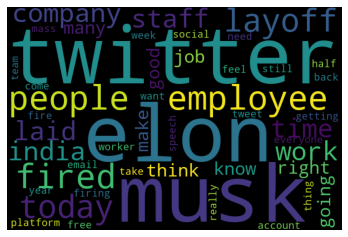

Topic 1: 



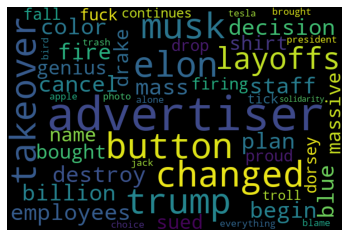

Topic 2: 



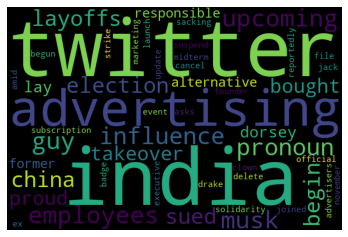

Topic 3: 



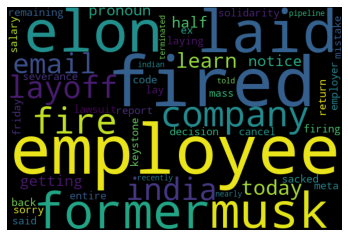

Topic 4: 



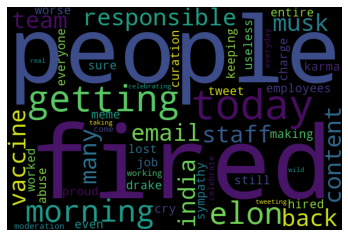

Topic 5: 



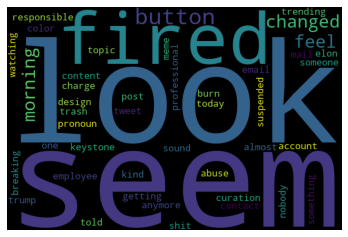

Topic 6: 



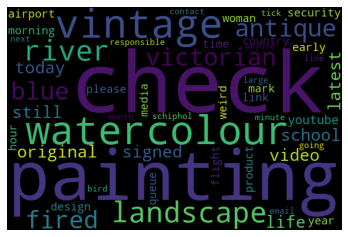

Topic 7: 



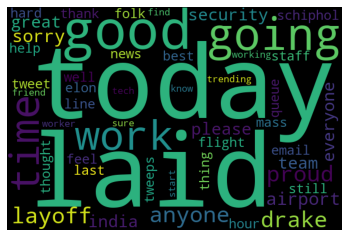

Topic 8: 



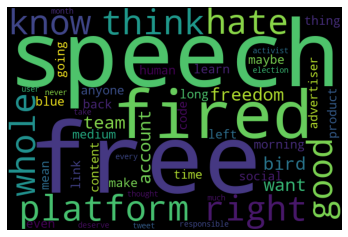

Topic 9: 



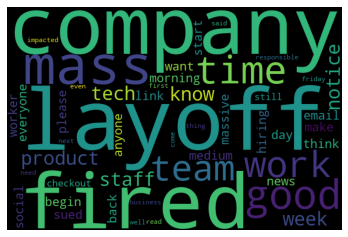

In [25]:
print("Word Cloud for LSA Model")
for i in range(10):
    print(f"Topic {i}: \n")
    draw_word_cloud(i)

## 2. Latent Dirichlet Allocation (LDA)

In [26]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)
# n_components is the number of topics

In [27]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(25491, 10)
[[0.04209519 0.04209519 0.04209519 ... 0.621138   0.04209519 0.04209856]
 [0.04209519 0.04209519 0.04209519 ... 0.621138   0.04209519 0.04209856]
 [0.02362729 0.02362574 0.02363022 ... 0.02362741 0.02362623 0.02366758]
 ...
 [0.02619921 0.10576325 0.02621419 ... 0.22964055 0.08011192 0.02621524]
 [0.02912018 0.02912163 0.02912479 ... 0.02912531 0.17699255 0.02912016]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]]


In [28]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, vect_text, vect, mds='tsne')
panel

PreparedData(topic_coordinates=                x          y  topics  cluster       Freq
topic                                                   
9      -16.906094  18.558477       1        1  14.919902
5      -47.327633 -32.642632       2        1  14.856326
3      -70.523521  50.860966       3        1  10.731650
7        7.173902  74.577049       4        1  10.402782
6       -4.294876 -95.882965       5        1   9.687057
8      -76.184364 -86.842094       6        1   8.855662
1       67.215706 -59.446781       7        1   8.432906
0       55.274727  18.023262       8        1   7.936159
2       12.537333 -33.389252       9        1   7.619386
4     -105.403755 -10.574617      10        1   6.558167, topic_info=         Term        Freq        Total Category  logprob  loglift
338    flight  425.000000   425.000000  Default  30.0000  30.0000
29    airport  536.000000   536.000000  Default  29.0000  29.0000
422      hour  297.000000   297.000000  Default  28.0000  28.0000
884     today  489.000000   489.000000  Default  27.0000  27.0000
755  security  352.000000   352.000000  Default  26.0000  26.0000
..        ...         ...          ...      ...      ...      ...
333      fire   89.816299   156.393373  Topic10  -3.7504   2.1699
408      help   72.125303   144.037123  Topic10  -3.9697   2.0328
918   twitter  192.220036  1152.331786  Topic10  -2.9895   0.9336
63     around   59.310376   113.280735  Topic10  -4.1653   2.0774
832     story   48.719646    65.922966  Topic10  -4.3620   2.4221

[517 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3         4  0.972348        2022
8         8  0.973777        able
9        10  0.989434    absolute
10        6  0.992022  absolutely
12        6  0.973229      access
...     ...       ...         ...
996       3  0.115096        year
996       4  0.402836        year
996       9  0.097832        year
997       3  0.983013   yesterday
999       6  0.977414        zero

[736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 4, 8, 7, 9, 2, 1, 3, 5])

In [29]:
sum=0
for i in lda_top[0]:
    sum=sum+i
print(sum) 

1.0


In [30]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
    print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  4.20951894790524 %
Topic  1 :  4.209518947768081 %
Topic  2 :  4.209518948133812 %
Topic  3 :  4.209518947279603 %
Topic  4 :  4.2095189487899125 %
Topic  5 :  4.209518946991606 %
Topic  6 :  4.209710957076409 %
Topic  7 :  62.11380015375385 %
Topic  8 :  4.209518947741825 %
Topic  9 :  4.209856254559675 %


In [31]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[ 0.10004071  0.10009249  0.100097   ...  0.10007181  0.10003139
   0.10005219]
 [ 0.10006938  0.10005939  0.10008012 ...  0.10010889  0.10007086
   0.10005529]
 [ 0.10004411  0.10034262  0.10043689 ...  0.10005619  0.10003311
   0.10005043]
 ...
 [ 0.10010112  0.10118891 26.17025827 ...  0.10011089 23.93034777
   0.10005675]
 [ 0.10005787  0.10007958  0.10004635 ...  0.10006438  0.10005669
  44.12837201]
 [ 0.10014131  0.1018812   0.10006115 ...  0.10006115  0.10002875
   0.10004498]]
(10, 1000)


In [32]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
flight line free right world airport follow speech think office 

Topic 1: 
getting notice news code latest queue drake account email video 

Topic 2: 
learn long coming soon going great link support control content 

Topic 3: 
security morning people good love minute feel airport make twitter 

Topic 4: 
twitter guy sure home early fire part taking house hell 

Topic 5: 
employee twitter layoff people job laid sorry better real worker 

Topic 6: 
time product start wait security happy like gate never know 

Topic 7: 
airport today check schiphol amsterdam waiting please trending really next 

Topic 8: 
hour anyone still day india trying well responsible every enough 

Topic 9: 
elon twitter musk employee staff today firing half losing company 



In [33]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic=""
    comp=lda_model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]
        
    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [34]:
# pip install --upgrade pip

In [35]:
# pip install --upgrade Pillow

Word Cloud for LDA Model
Topic 0: 



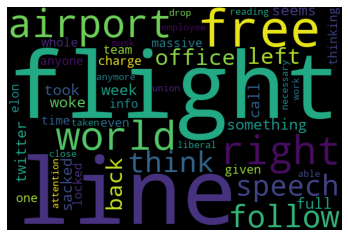

Topic 1: 



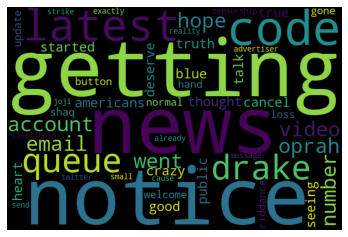

Topic 2: 



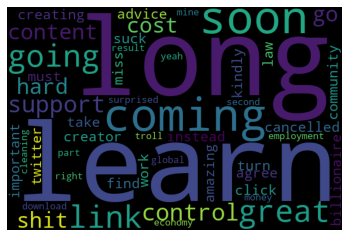

Topic 3: 



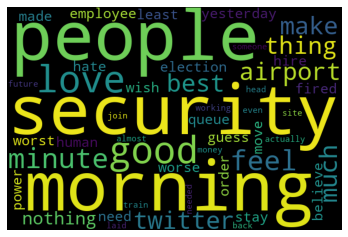

Topic 4: 



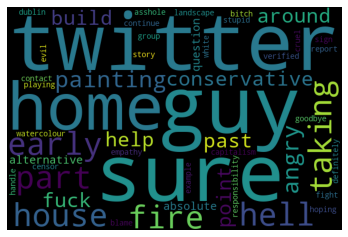

Topic 5: 



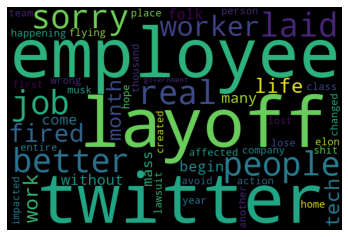

Topic 6: 



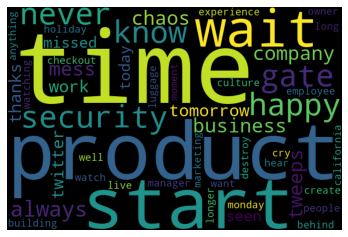

Topic 7: 



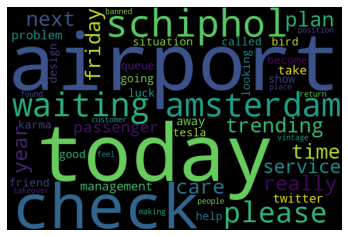

Topic 8: 



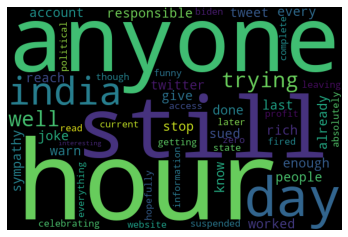

Topic 9: 



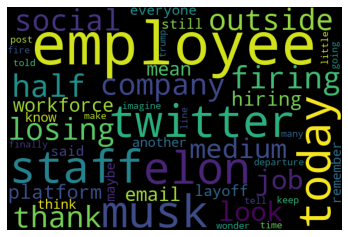

In [36]:
print("Word Cloud for LDA Model")
for i in range(10):
    print(f"Topic {i}: \n")
    draw_word_cloud(i)

# 3. Non-negative Matrix Factorization(NMF)

In [37]:
from sklearn.decomposition import NMF

# Create an NMF model with 10 topics
nmf_model = NMF(n_components=10)

# Fit the model on the term-document matrix
nmf_fit = nmf_model.fit_transform(vect_text)

In [38]:
# Get the feature names (terms) from the vectorizer
feature_names = vect.get_feature_names_out()

# Print the top 10 terms for each topic
for i, topic in enumerate(nmf_model.components_):
    print(f'Top 10 terms for Topic {i}:')
    print([feature_names[idx] for idx in topic.argsort()[:-11:-1]])
    print('\n')

Top 10 terms for Topic 0:
['twitter', 'india', 'staff', 'account', 'guy', 'advertising', 'employees', 'blue', 'platform', 'election']


Top 10 terms for Topic 1:
['elon', 'musk', 'staff', 'fire', 'changed', 'trump', 'employees', 'firing', 'button', 'layoffs']


Top 10 terms for Topic 2:
['people', 'work', 'good', 'time', 'job', 'know', 'many', 'would', 'company', 'make']


Top 10 terms for Topic 3:
['employee', 'laid', 'former', 'fire', 'company', 'india', 'learn', 'feel', 'job', 'firing']


Top 10 terms for Topic 4:
['fired', 'morning', 'getting', 'responsible', 'team', 'back', 'email', 'staff', 'tweet', 'content']


Top 10 terms for Topic 5:
['like', 'look', 'feel', 'looks', 'would', 'button', 'changed', 'seems', 'sound', 'tweet']


Top 10 terms for Topic 6:
['check', 'painting', 'vintage', 'watercolour', 'landscape', 'river', 'victorian', 'antique', 'blue', 'original']


Top 10 terms for Topic 7:
['today', 'laid', 'drake', 'going', 'proud', 'sorry', 'security', 'india', 'email', 'ai

In [39]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic=""
    comp=nmf_model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]
        
    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

Word Cloud for NMF Model
Topic 0: 



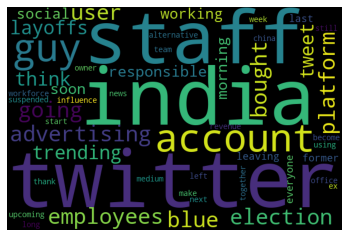

Topic 1: 



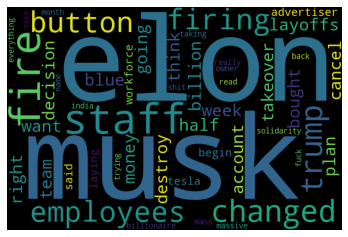

Topic 2: 



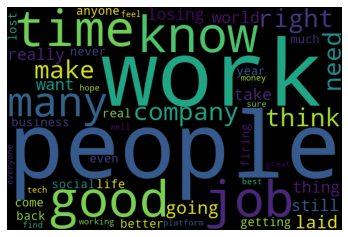

Topic 3: 



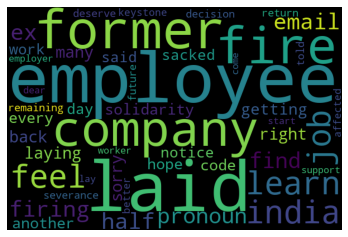

Topic 4: 



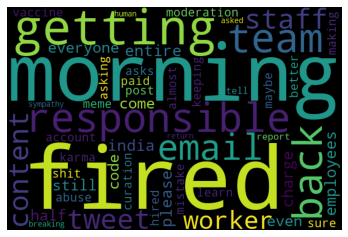

Topic 5: 



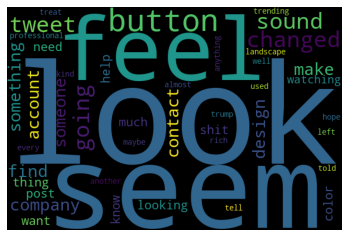

Topic 6: 



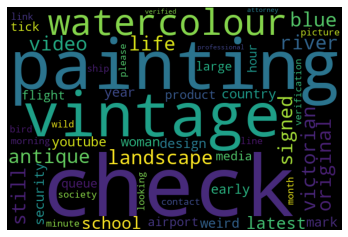

Topic 7: 



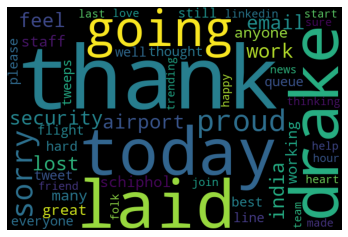

Topic 8: 



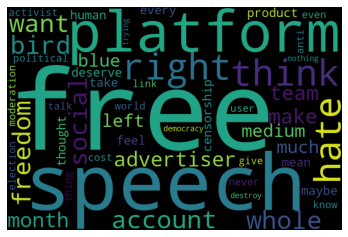

Topic 9: 



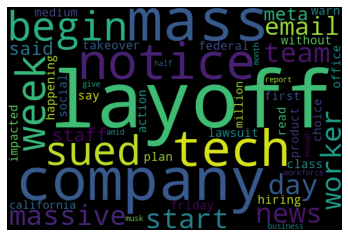

In [40]:
print("Word Cloud for NMF Model")
for i in range(10):
    print(f"Topic {i}: \n")
    draw_word_cloud(i)

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate LDA coherence score
lda_topic_matrix = lda_model.components_
lda_sim_matrix = cosine_similarity(vect_text, lda_topic_matrix)
lda_coherence = np.mean([np.mean([lda_sim_matrix[i][j] for j in range(lda_topic_matrix.shape[0]) if j != lda_sim_matrix[i].argmax()]) for i in range(lda_sim_matrix.shape[0])])
print('LDA Coherence Score:', lda_coherence)

# Calculate LSA coherence score
lsa_topic_matrix = lsa_model.components_
lsa_sim_matrix = cosine_similarity(vect_text, lsa_topic_matrix)
lsa_coherence = np.mean([np.mean([lsa_sim_matrix[i][j] for j in range(lsa_topic_matrix.shape[0]) if j != i]) for i in range(lsa_topic_matrix.shape[0])])
print('LSA Coherence Score:', lsa_coherence)

# Calculate NMF coherence score
nmf_topic_matrix = nmf_model.components_
nmf_sim_matrix = cosine_similarity(vect_text, nmf_topic_matrix)
nmf_coherence = np.mean([np.mean([nmf_sim_matrix[i][j] for j in range(nmf_topic_matrix.shape[0]) if j != nmf_sim_matrix[i].argmax()]) for i in range(nmf_sim_matrix.shape[0])])
print('NMF Coherence Score:', nmf_coherence)


LDA Coherence Score: 0.03983754368344413
LSA Coherence Score: 0.018602737500018
NMF Coherence Score: 0.019266208960842666


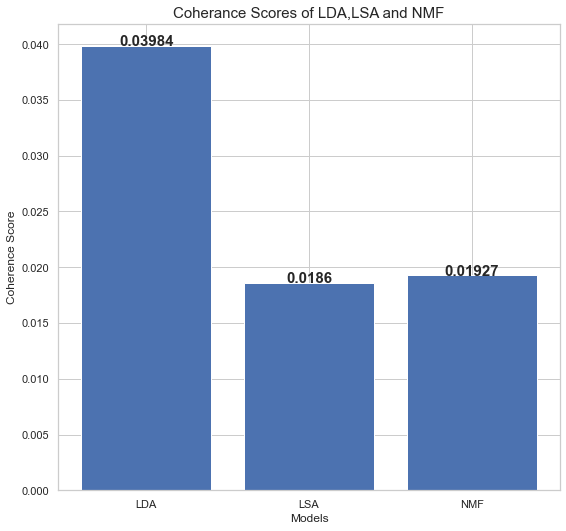

In [42]:
# Plot coherence scores
fig, ax = plt.subplots(figsize=(8,8))

coherence_scores = [lda_coherence, lsa_coherence, nmf_coherence]
models = ['LDA', 'LSA', 'NMF']
plt.bar(models, coherence_scores)
plt.title("Coherance Scores of LDA,LSA and NMF", size=15)
plt.xlabel("Models")
plt.ylabel("Coherence Score")
for index in range(len(models)):
    ax.text(models[index], coherence_scores[index], str(round(coherence_scores[index],5)), ha = 'center',weight= 'bold',size=15)
#     ax.text(i.get_x()+0.03, i.get_height()*1.013,str(round(i.get_height()*100, 2))+'%')
plt.show()